In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

## Autofluorescence settings

In [2]:
n2_path = '/Users/blandt/Desktop/Analysis/Experiments/e2001__par2_rundown/200129_n2b_wt_tom4,15,60'
af = AfCorrelation(direcslist(n2_path), sigma=2, expand=5, method='OLS')
af.run()
print(af.params)

[2.087860334755449, -1855.3533172739662]


<IPython.core.display.Javascript object>


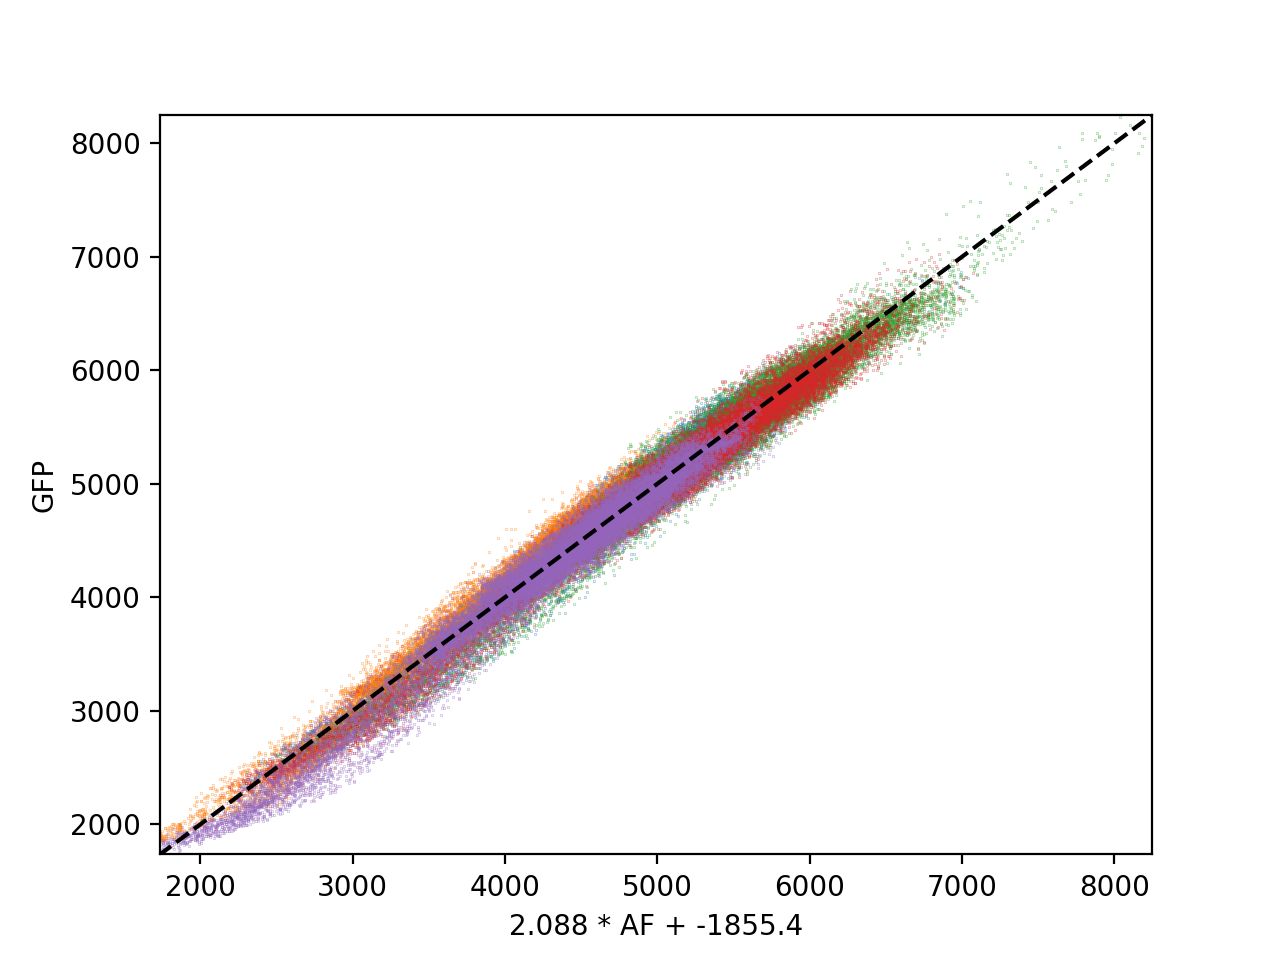

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='2.088 * AF + -1855.4', ylabel='GFP'>)

In [3]:
af.plot_prediction(s=0.01)

In [4]:
n2_path = '/Users/blandt/Desktop/Analysis/Experiments/e2001__par2_rundown/200129_n2b_wt_tom4,15,60'
af_3channel = AfCorrelation(direcslist(n2_path), rfp_regex='*561 SP 630-75*', sigma=2, expand=5, method='OLS')
af_3channel.run()
print(af_3channel.params)

[2.054042306784717, -0.226784890206107, -1150.3720414240652]


<IPython.core.display.Javascript object>


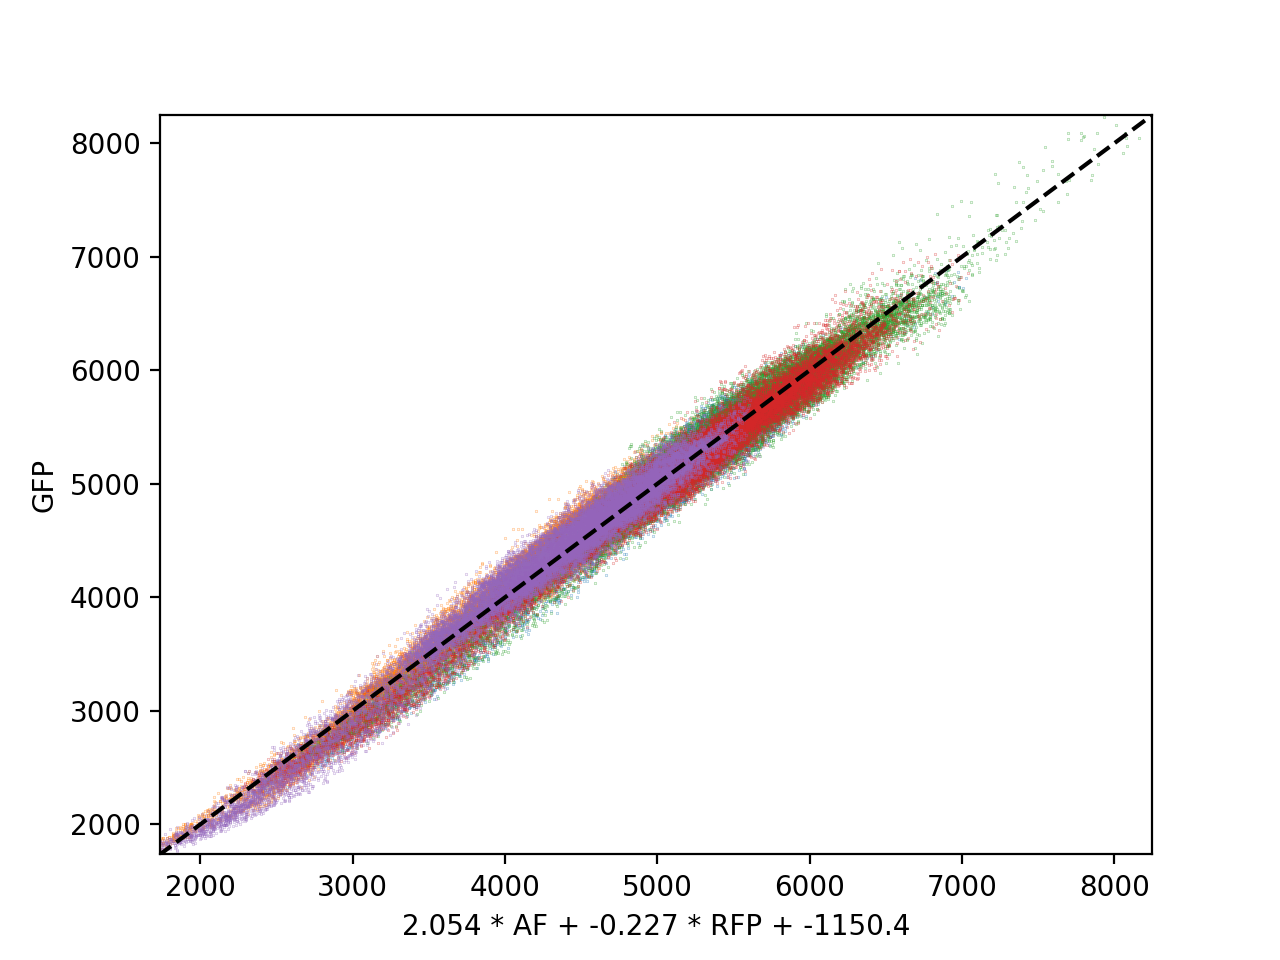

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='2.054 * AF + -0.227 * RFP + -1150.4', ylabel='GFP'>)

In [5]:
af_3channel.plot_prediction(s=0.01)

## Load data

In [6]:
path = '/Users/blandt/Desktop/Analysis/Experiments/e2001__par2_rundown/200129_lp637_wt_tom4,15,60'
direcs = direcslist(path)

imgs = [load_image(p + '/af_corrected.tif') for p in direcs]
rois = [np.loadtxt(d + '/ROI_fit.txt') for d in direcs]

## Optimise membrane reference profile

In [18]:
sigma = 2
thickness = 50
membg = np.exp(-((np.arange(thickness) - thickness / 2) ** 2) / (2 * sigma ** 2))
cytbg = np.loadtxt('../GCN4 PAR-2/cyt_profile.txt')

iq = ImageQuant(imgs, roi=rois, iterations=2, adaptive_membg=True, thickness=50, cytbg=cytbg, membg=membg, 
                descent_steps=500, uni_cyt=True, nfits=100, lr=0.002)

In [19]:
iq.run()

100%|██████████| 500/500 [01:11<00:00,  6.97it/s]


Time elapsed: 145.95 seconds 


<IPython.core.display.Javascript object>


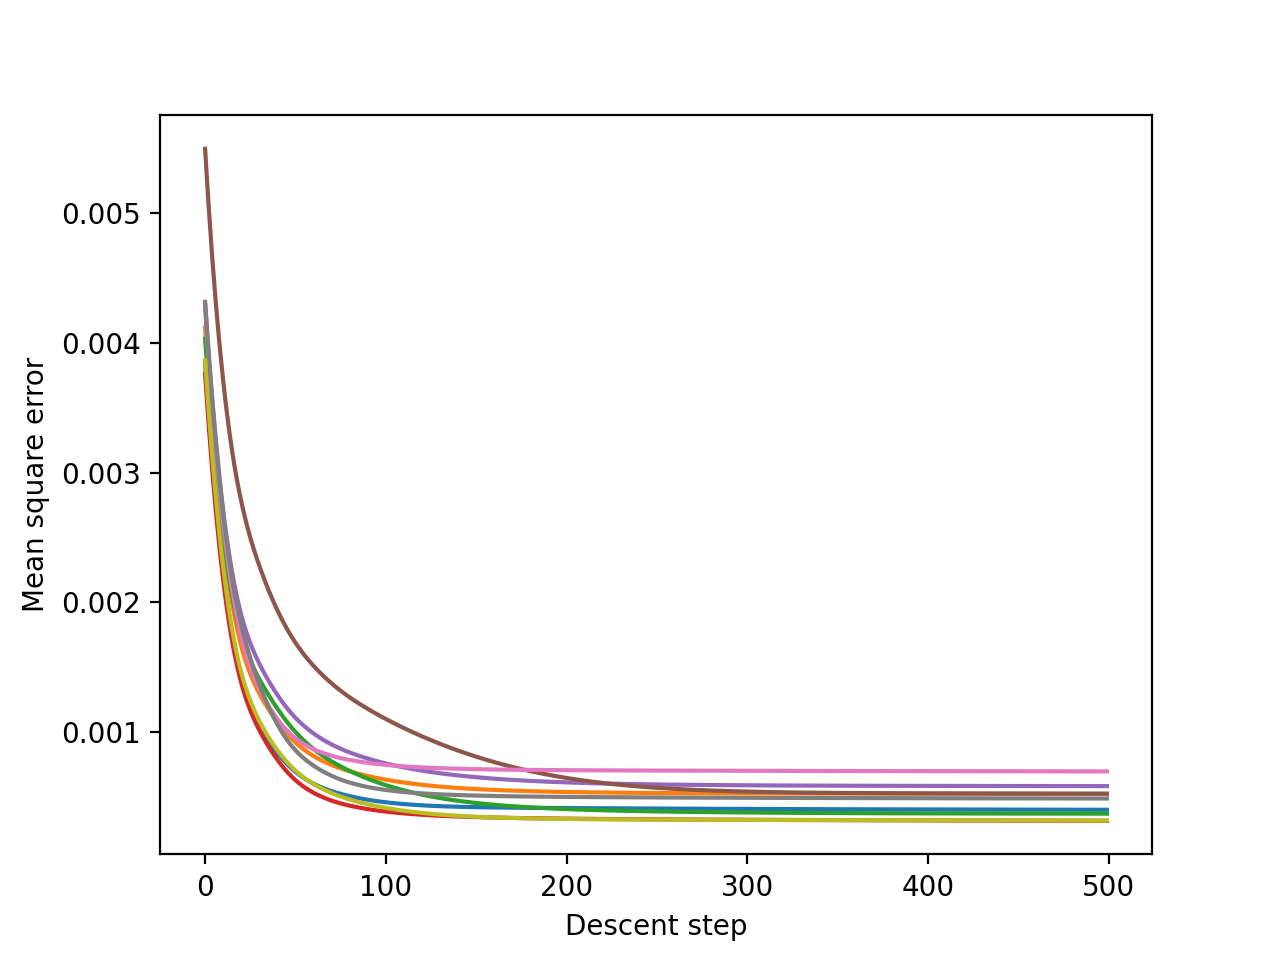

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='Mean square error'>)

In [21]:
iq.plot_losses()

## View results

<IPython.core.display.Javascript object>


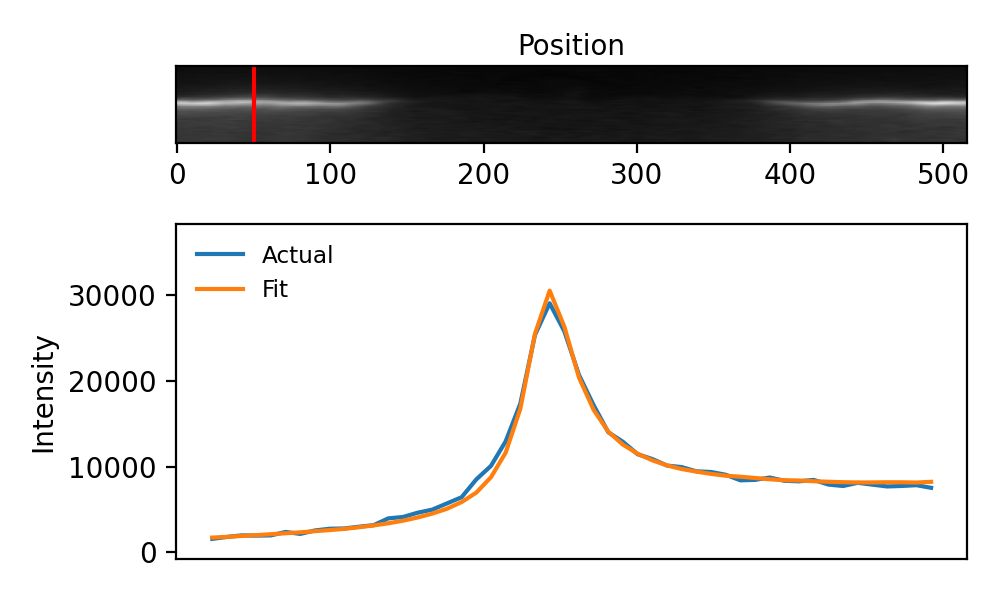

interactive(children=(IntSlider(value=0, description='Frame', max=8), FloatSlider(value=0.1, description='Posi…

(<Figure size 500x300 with 2 Axes>,
 (<AxesSubplot:xlabel='Position'>, <AxesSubplot:ylabel='Intensity'>))

In [22]:
iq.plot_fits(jupyter=True)

<IPython.core.display.Javascript object>


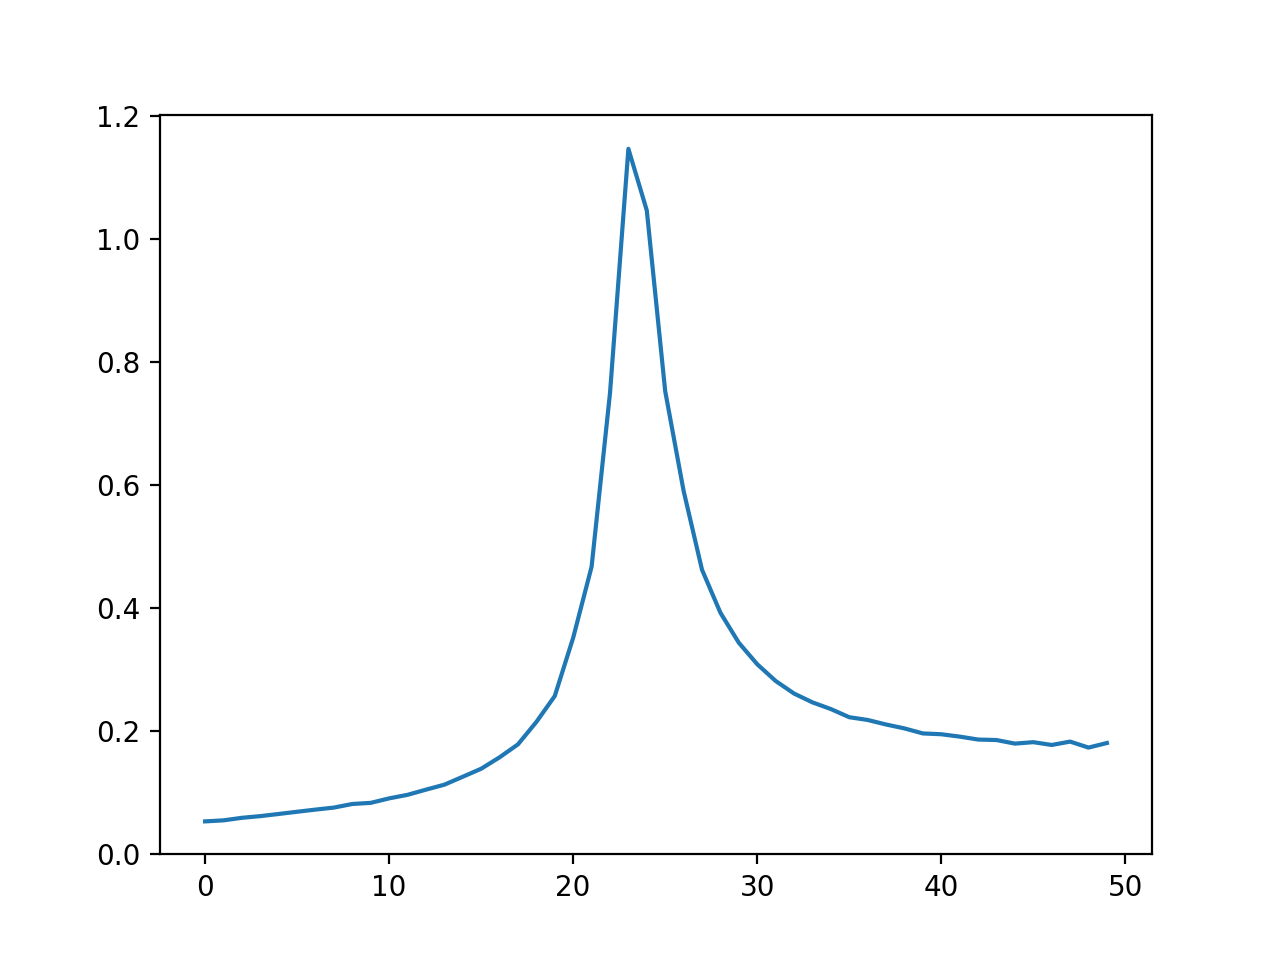

(0.0, 1.2008830479548362)

In [23]:
fig, ax = plt.subplots()
ax.plot(iq.membg)
ax.set_ylim(bottom=0)

## Save

In [24]:
np.savetxt('membg.txt', iq.membg)

## Test: optimising cytoplasmic profile

In [11]:
# sigma = 2
# thickness = 50
# position_weights = np.r_[np.zeros(40), np.ones(20), np.zeros(40)]

# iq = ImageQuant(imgs, roi=rois, iterations=2, thickness=50, adaptive_cytbg=True,
#                 descent_steps=1000, uni_cyt=True, nfits=100, position_weights=position_weights)


In [12]:
# iq.run()

In [13]:
# iq.plot_fits(jupyter=True)